In [1]:

import numpy  as np
import pandas as pd


from models.classifiers import Classifiers
from models.custom_ml_classifiers import CustomMLClassifiers

import warnings
warnings.filterwarnings('ignore')


/Users/firattamur/Desktop/spring22/indr491/QNBFinansBank/env/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:

# data paths
path_train_baseline = "./data/train_imputed_onehotencoded.csv"


In [3]:

# read data into data frame
df_train = pd.read_csv(path_train_baseline)
df_train.head()


,ID,VAR0,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,...,CAT158,CAT159,CAT160,CAT161,CAT162,CAT163,CAT164,CAT165,CAT166,CAT167
0,0,0.799805,0.184174,0.000000,0.000000,0.168984,0.037037,0.000000,0.200195,0.788112,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,0.725049,0.180594,0.000000,0.000000,0.165312,0.090790,0.054237,0.255107,0.722679,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2,0.799805,0.199255,0.000000,0.000000,0.167613,0.000000,0.000000,0.200195,0.788112,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,0.677137,0.209870,0.166667,0.181818,0.190511,0.222222,0.125000,0.322863,0.788112,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,0.725049,0.180594,0.000000,0.000000,0.165312,0.000000,0.054237,0.255107,0.722679,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


Training GAUSSIANNB...
 executed in 0.1 seconds.
Training DecisionTree...
 executed in 0.3 seconds.
Training KNeighbors...
 executed in 1.3 seconds.
Training LogisticReg...
 executed in 0.4 seconds.
Training RandomForest...
 executed in 2.6 seconds.
Training XGBoost...
[03:06:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:06:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:06:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'bina

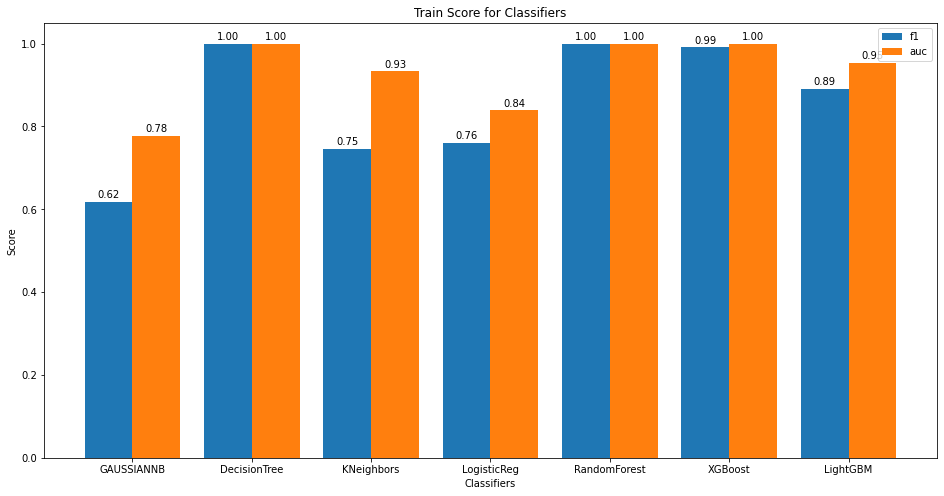

Testing GAUSSIANNB...
 ###### Confusion Matrix #######
[[116  33]
 [ 66  84]]
 ###############################
 executed in 0.0 seconds.
Testing DecisionTree...
 ###### Confusion Matrix #######
[[98 51]
 [53 97]]
 ###############################
 executed in 0.0 seconds.
Testing KNeighbors...
 ###### Confusion Matrix #######
[[125  24]
 [ 93  57]]
 ###############################
 executed in 0.0 seconds.
Testing LogisticReg...
 ###### Confusion Matrix #######
[[108  41]
 [ 43 107]]
 ###############################
 executed in 0.0 seconds.
Testing RandomForest...
 ###### Confusion Matrix #######
[[107  42]
 [ 36 114]]
 ###############################
 executed in 0.0 seconds.
Testing XGBoost...
 ###### Confusion Matrix #######
[[103  46]
 [ 39 111]]
 ###############################
 executed in 0.0 seconds.
Testing LightGBM...
 ###### Confusion Matrix #######
[[106  43]
 [ 36 114]]
 ###############################
 executed in 0.0 seconds.


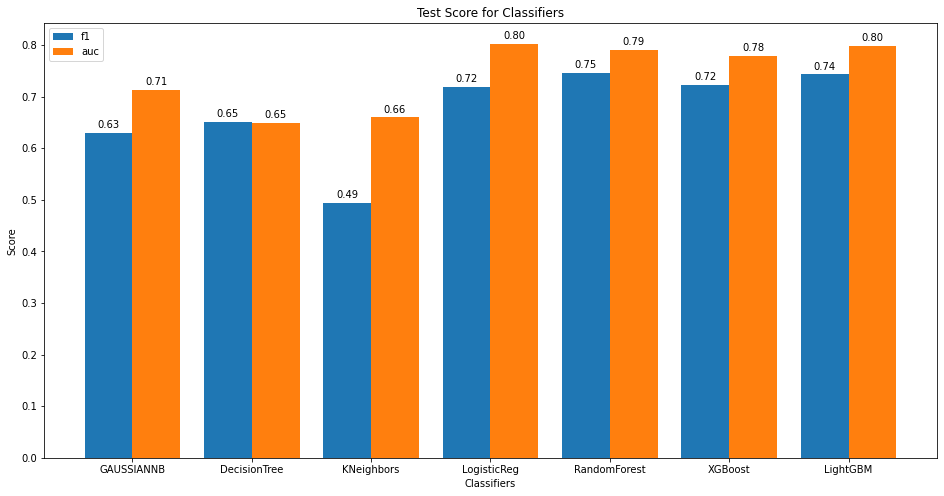

In [4]:

col     = "TARGET"
exclude = ["ID"]

data_negative = df_train[df_train[col] == 0].sample(1491)
data_positive = df_train[df_train[col] == 1].sample(1491)
data          = pd.concat([data_negative, data_positive]).sample(frac=1)

# drop excluded columns and target column for X value
X = data.drop(exclude + [col], axis=1).values

# get target values
y = data[col].values

classifiers  = Classifiers(X, y, test_size=0.10, classifiers = CustomMLClassifiers.list(set_class_weight=False))

scores_train = classifiers.compare_train(cv=5)
score_test   = classifiers.compare_test()

